In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import tree



In [2]:
data=pd.read_csv('LR-testSet.csv',header=None)
print(data)

           0          1  2
0  -0.017612  14.053064  0
1  -1.395634   4.662541  1
2  -0.752157   6.538620  0
3  -1.322371   7.152853  0
4   0.423363  11.054677  0
5   0.406704   7.067335  1
6   0.667394  12.741452  0
7  -2.460150   6.866805  1
8   0.569411   9.548755  0
9  -0.026632  10.427743  0
10  0.850433   6.920334  1
11  1.347183  13.175500  0
12  1.176813   3.167020  1
13 -1.781871   9.097953  0
14 -0.566606   5.749003  1
15  0.931635   1.589505  1
16 -0.024205   6.151823  1
17 -0.036453   2.690988  1
18 -0.196949   0.444165  1
19  1.014459   5.754399  1
20  1.985298   3.230619  1
21 -1.693453  -0.557540  1
22 -0.576525  11.778922  0
23 -0.346811  -1.678730  1
24 -2.124484   2.672471  1
25  1.217916   9.597015  0
26 -0.733928   9.098687  0
27 -3.642001  -1.618087  1
28  0.315985   3.523953  1
29  1.416614   9.619232  0
..       ...        ... ..
70  0.074798  11.023650  0
71 -1.337472   0.468339  1
72 -0.102781  13.763651  0
73 -0.147324   2.874846  1
74  0.518389   9.887035  0
7

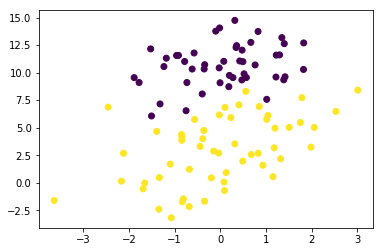

In [3]:
x_data=data.iloc[:,:-1]
y_data=data.iloc[:,-1]
plt.scatter(x_data.iloc[:,0],x_data.iloc[:,1],c=y_data)

In [4]:
#用决策树进行分类

In [5]:
model=tree.DecisionTreeClassifier()
model.fit(x_data,y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
import graphviz

In [7]:
dot_data=tree.export_graphviz(model,
                              out_file=None,
                              feature_names=['x','y'],
                              class_names=['label0','label1'],
                              filled=True,
                              rounded=True,
                              special_characters=True
                             )

In [8]:
graph=graphviz.Source(dot_data)
graph.render('cart')

'cart.pdf'

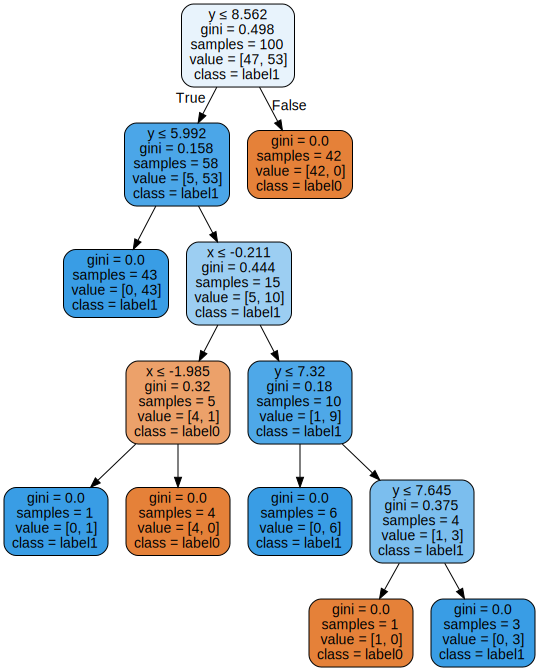

In [9]:
graph

In [10]:
x_min,x_max=x_data.values[:,0].min()-1,x_data.values[:,0].max()+1
y_min,y_max=x_data.values[:,1].min()-1,x_data.values[:,1].max()+1

In [11]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),
                  np.arange(y_min,y_max,0.02)
                 )

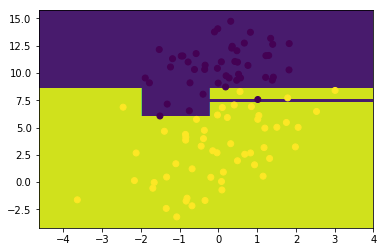

In [12]:
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
cs=plt.contourf(xx,yy,z)
plt.scatter(x_data.iloc[:,0],x_data.iloc[:,1],c=y_data)

In [13]:
predictions=model.predict(x_data)
print(classification_report(predictions,y_data))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        47
          1       1.00      1.00      1.00        53

avg / total       1.00      1.00      1.00       100

